In [2]:
pip install import-ipynb


Note: you may need to restart the kernel to use updated packages.


In [3]:
import import_ipynb
import AnalisisCartas
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json

importing Jupyter notebook from AnalisisCartas.ipynb


In [6]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
analisisC = AnalisisCartas.CardAnalisis()
dfCartas = analisisC.get_dataframe()

In [12]:
#La información nos muestra cada carta como una columna
print(dfCartas.info())
#Usaremos la funcion transpose de nuestro dataframe para usar los datos como columnas y las cartas como filas
dfCartas = dfCartas.transpose()
print(dfCartas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, colorIdentity to hasNoDeckLimit
Columns: 19519 entries, Abandon Hope to Zurgo Helmsmasher
dtypes: object(19519)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 19519 entries, Abandon Hope to Zurgo Helmsmasher
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   colorIdentity          19519 non-null  object
 1   colors                 19519 non-null  object
 2   convertedManaCost      19519 non-null  object
 3   edhrecRank             19304 non-null  object
 4   foreignData            19519 non-null  object
 5   layout                 19519 non-null  object
 6   legalities             19519 non-null  object
 7   manaCost               18705 non-null  object
 8   mtgoFoilId             12622 non-null  object
 9   mtgoId                 14889 non-null  object
 10  name                   19519 non-null  object
 11  printings

In [14]:
#Visualizacion del dataframe
dfCartas

,colorIdentity,colors,convertedManaCost,edhrecRank,foreignData,layout,legalities,manaCost,mtgoFoilId,mtgoId,...,power,toughness,faceConvertedManaCost,names,side,isReserved,leadershipSkills,loyalty,colorIndicator,hasNoDeckLimit
Abandon Hope,[B],[B],2.0,13417,"[{'language': 'German', 'name': 'Verlust der H...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{X}{1}{B},9992,9991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandon Reason,[R],[R],3.0,7558,"[{'language': 'German', 'name': 'Abkehr von de...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{R},61409,61408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandoned Outpost,[W],[],0.0,12416,"[{'language': 'German', 'name': 'Aufgegebener ...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",NaN,16468,16467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandoned Sarcophagus,[],[],3.0,6972,"[{'flavorText': 'Was einst ruhte, ruht nicht m...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3},64841,64840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abattoir Ghoul,[B],[B],4.0,9906,[{'flavorText': '死は彼の人間性を奪ったが、包丁使いの腕までは奪わなかった。...,normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3}{B},NaN,NaN,...,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuran Enchanter,"[B, U]",[U],2.0,18731,"[{'language': 'German', 'name': 'Zuranischer V...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{1}{U},NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zuran Orb,[],[],0.0,1760,[],normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zuran Spellcaster,[U],[U],3.0,9265,"[{'language': 'German', 'name': 'Zuranischer Z...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{U},NaN,24481,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zurgo Bellstriker,[R],[R],1.0,6287,"[{'language': 'German', 'name': 'Zurgo Glocken...",normal,"{'commander': 'Legal', 'duel': 'Restricted', '...",{R},56051,56050,...,2,2,NaN,NaN,NaN,NaN,"{'brawl': False, 'commander': True, 'oathbreak...",NaN,NaN,NaN


## El dataframe ya se encuentra listo para poder realizar visualizaciones de los datos

Grafica de las catas por el coste de mana convertido

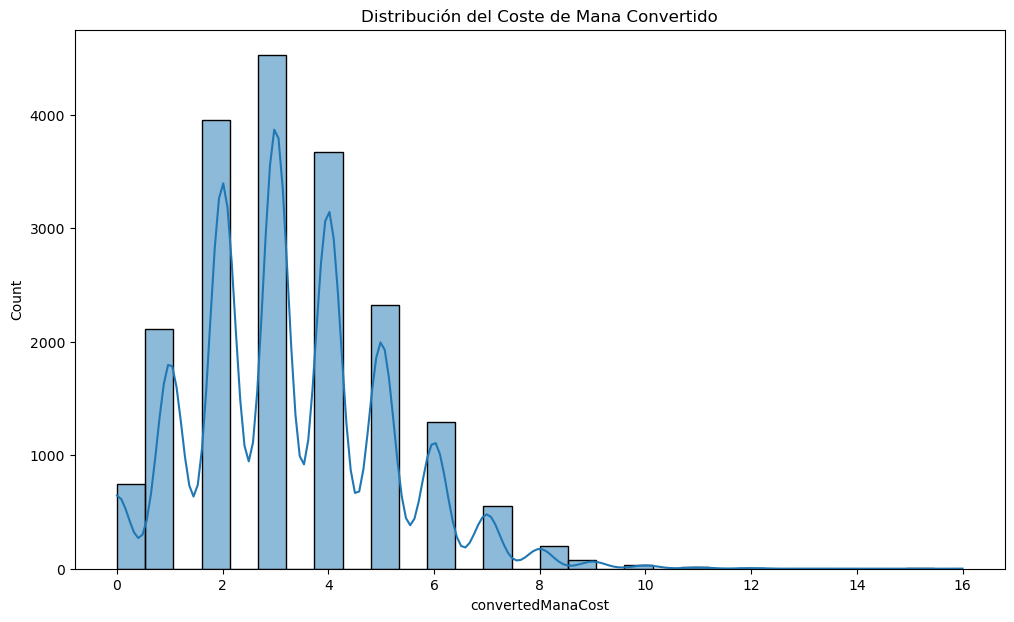

In [68]:
plt.figure(figsize=(12,7))
sns.histplot(df['convertedManaCost'], bins=30, kde=True)
plt.title('Distribución por Coste de Mana Convertido')
plt.show()

# En el siguiente gráfico relizaremos un conteo de las cartas tanto por su identidad de color y color para asi ver la diferencia

In [46]:
#Agrupamos la columna de indentidad de color
agrupacionIdentidadColores = dfCartas['colorIdentity'].apply(lambda x: ''.join(sorted(x)))
conteoIdentidadColores = agrupacionIdentidadColores.value_counts()
#Agrupamos la columna colores
agrupacionColores = dfCartas['colors'].apply(lambda x: ''.join(sorted(x)))
conteoColores = agrupacionColores.value_counts()

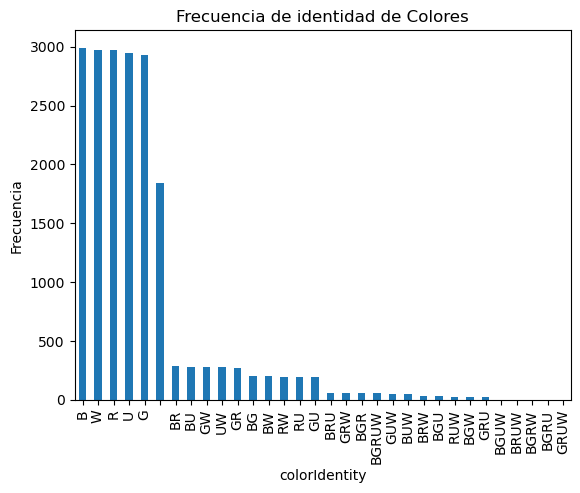

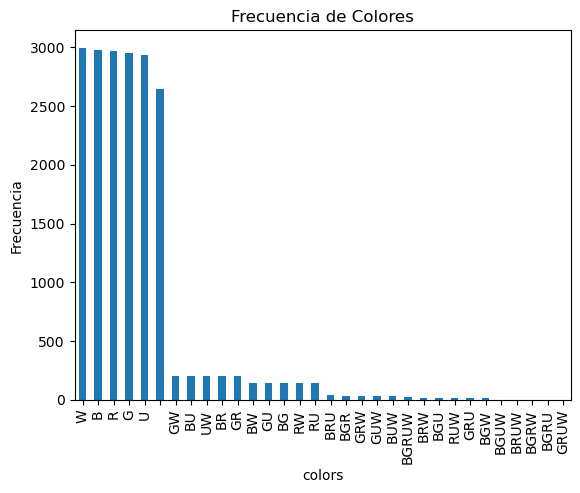

In [48]:
#Mostraremos ambos graficos para poder ver las diferencias
conteoIdentidadColores.plot(kind='bar')
plt.xlabel('colorIdentity')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de identidad de Colores')
plt.show()

conteoColores.plot(kind='bar')
plt.xlabel('colors')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Colores')
plt.show()